In [32]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import sys
sys.path.append("../src/features/")
from graph_embed import GraphEmbed
sys.path.append("../src/models/")
from cluster_graphs import ClusterGraphs
sys.path.append("../src/visualization/")
from visualize import Visualize

In [33]:
clusters = pd.read_pickle("../models/graphs_clustered.pkl")
graphs = GraphEmbed().read_graphs("../data/processed/graphs/")
viz = Visualize(clusters, graphs)

In [34]:
topology_stats = ["num_nodes", "num_edges", "num_strongly_connected", "num_weakly_connected", "average_clustering_coef"]

In [35]:
clust1 = clusters.loc[clusters.label == 1]
clust2 = clusters.loc[clusters.label == 2]
clust0 = clusters.loc[clusters.label == 0]

## Cluster Analysis

Chose 3 clusters based on the elbow plot

In [36]:
cl = ClusterGraphs(clusters)
num_clusters, inertias = cl.choose_clust_num_k_means()

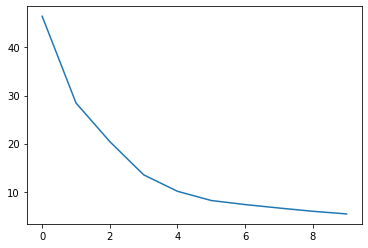

In [37]:
plt.plot(inertias)

## Data Summary

In [38]:
# 760 total graphs
len(clusters)

760

In [39]:
clusters.label.value_counts()

2    547
0    207
1      6
Name: label, dtype: int64

In [40]:
clusters.domain.value_counts()

trendingpolitics.com          63
swarajyamag.com               42
zerohedge.com                 36
gnews.org                     35
washingtontimes.com           34
childrenshealthdefense.org    32
prageru.com                   28
wattsupwiththat.com           28
rt.com                        25
toddstarnes.com               25
frontpagemag.com              25
thelibertydaily.com           23
peta.org                      22
quillette.com                 22
churchmilitant.com            21
everytown.org                 21
infowars.com                  21
blacklistednews.com           20
townhall.com                  18
cnsnews.com                   18
democrats.org                 15
projectveritas.com            14
thehighwire.com               14
greenpeace.org                13
bigleaguepolitics.com         13
globaltimes.cn                11
gulfnews.com                  10
indiatimes.com                10
mindbodygreen.com              9
americanthinker.com            9
breitbart.

In [41]:
clusters.num_nodes.describe()

count    760.000000
mean      36.056579
std       77.881337
min        4.000000
25%        8.750000
50%       13.000000
75%       29.000000
max      976.000000
Name: num_nodes, dtype: float64

In [42]:
clusters.num_edges.describe()

count     760.000000
mean       35.807895
std        94.922255
min         3.000000
25%         7.000000
50%        11.500000
75%        26.000000
max      1328.000000
Name: num_edges, dtype: float64

In [43]:
clusters.num_strongly_connected.describe()

count    760.000000
mean      35.905263
std       77.555498
min        3.000000
25%        8.000000
50%       13.000000
75%       29.000000
max      967.000000
Name: num_strongly_connected, dtype: float64

In [44]:
clusters.num_weakly_connected.describe()

count    760.000000
mean       3.064474
std        5.348690
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       95.000000
Name: num_weakly_connected, dtype: float64

## Visualizing graphs in each cluster

In [45]:
mean_ids = clusters.loc[clusters.is_mean_vec == True].id.to_list()
SAMPLE_NUM = 6

### Cluster 1

In [46]:
clust1_ids = clust1.sample(SAMPLE_NUM).id.to_list()

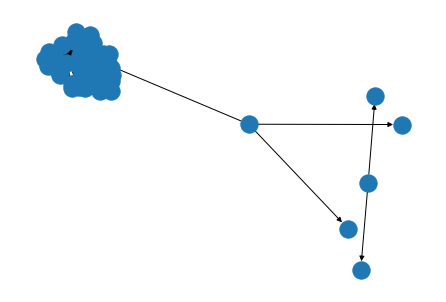

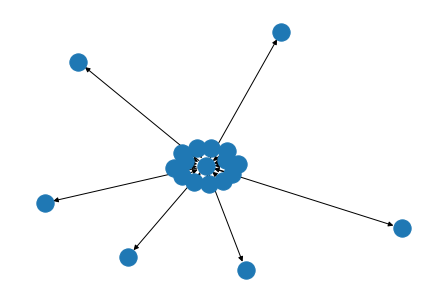

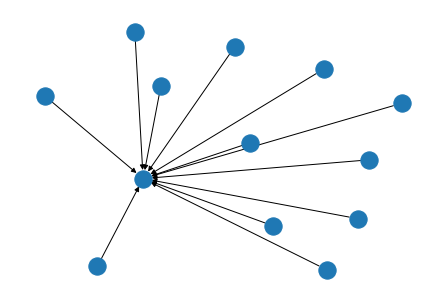

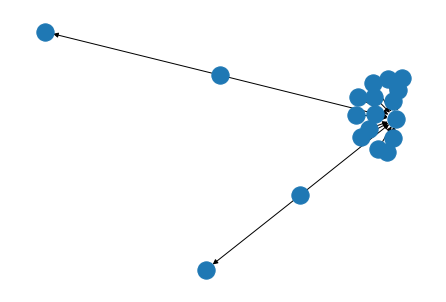

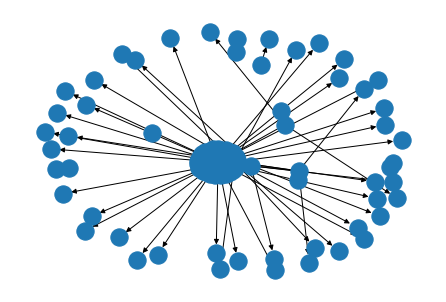

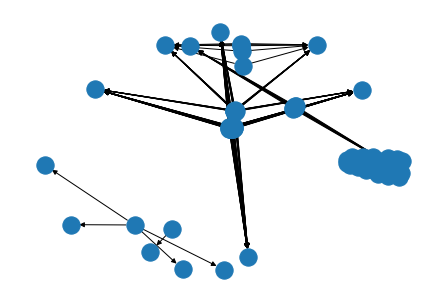

In [47]:
viz.viz_graphs(clust1_ids)

#### Mean Graph

In [48]:
clusters.loc[clusters.id == mean_ids[0]].domain

334    peta.org
Name: domain, dtype: object

In [49]:
clusters.loc[clusters.id == mean_ids[0]].title.values[0]

'Make a Change for the Better—Try Our 3-Week Vegan Challenge'

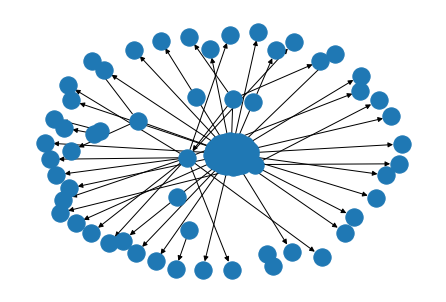

In [50]:
nx.draw(graphs[mean_ids[0]])

### Cluster 2

In [51]:
clust2_ids = clust2.sample(SAMPLE_NUM).id.to_list()

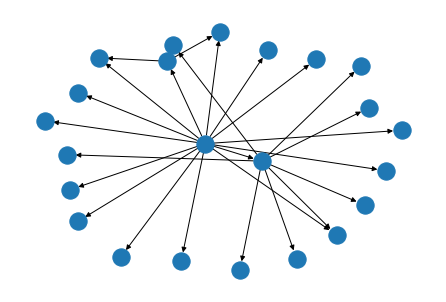

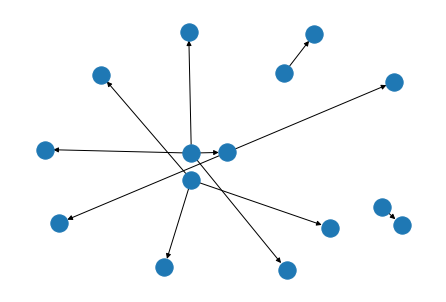

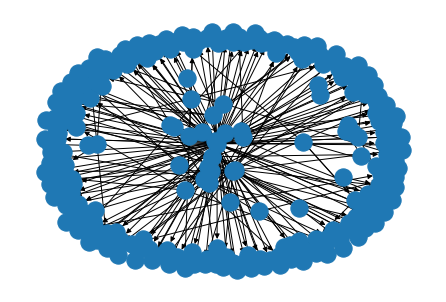

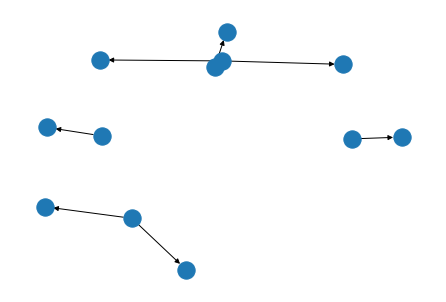

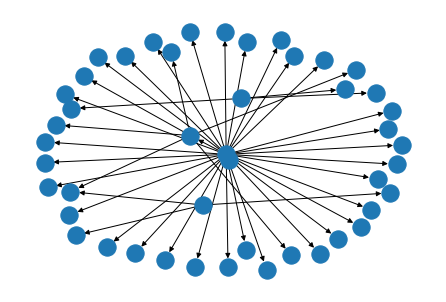

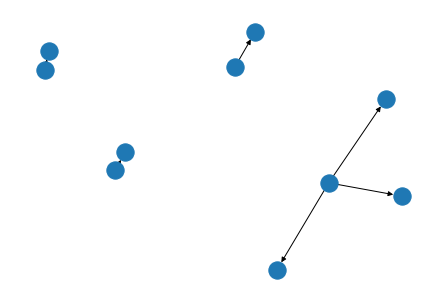

In [52]:
viz.viz_graphs(clust2_ids)

#### Mean Graph

In [53]:
clusters.loc[clusters.id == mean_ids[1]].domain

348    peta.org
Name: domain, dtype: object

In [54]:
clusters.loc[clusters.id == mean_ids[1]].title.values[0]

"Patagonia's 'Sustainable Wool' Supplier EXPOSED: Lambs Skinned Alive, Throats Slit, Tails Cut Off"

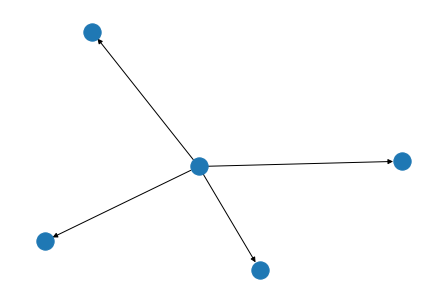

In [55]:
nx.draw(graphs[mean_ids[1]])

#### Cluster 0

In [56]:
clust0_ids = clust0.sample(SAMPLE_NUM).id.to_list()

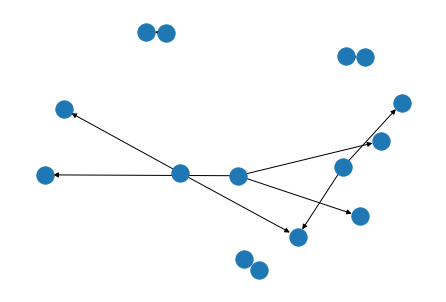

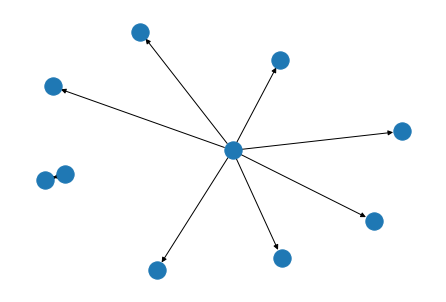

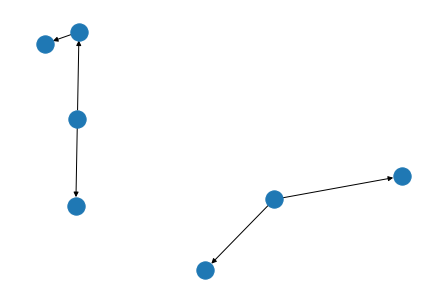

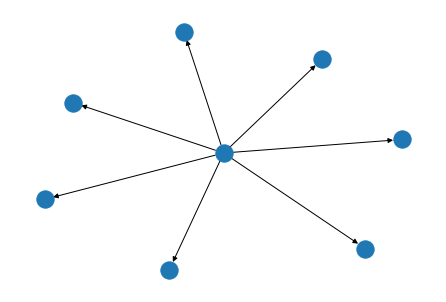

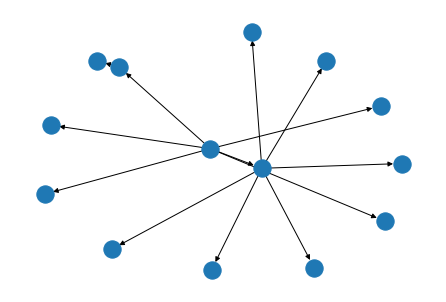

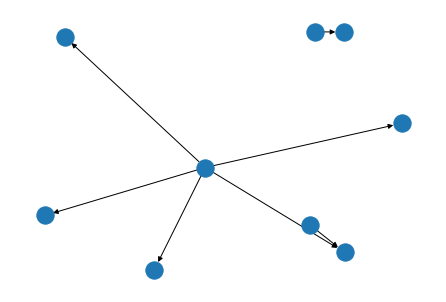

In [57]:
viz.viz_graphs(clust0_ids)

#### Mean Graph

In [58]:
clusters.loc[clusters.id == mean_ids[2]].domain

532    thelibertydaily.com
Name: domain, dtype: object

In [59]:
clusters.loc[clusters.id == mean_ids[2]].title.values[0]

'Media Loudly Reports Allen West’s Wife ‘Arrested for DWI With Child in Car,’ but Buries One Important Fact'

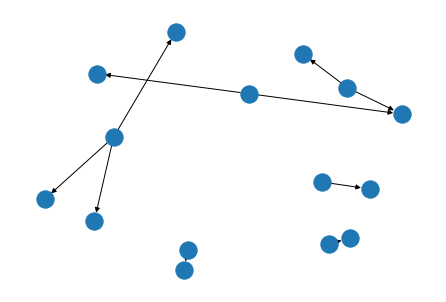

In [60]:
nx.draw(graphs[mean_ids[2]])

## Exploring Differences in Clusters

In [61]:
viz.graph_point_range_cluster_info(topology_stats, 300, 500, 2)

alt.FacetChart(...)